# Analysis of intervention measures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from os.path import join
from os import listdir
import numpy as np
import seaborn as sns

## Intervention measures

In [2]:
src = '../../data/simulation_results/ensembles_intervention_measures'

results = pd.DataFrame()
for f in listdir(src):
    tmp = pd.read_csv(join(src, f))
    results = pd.concat([results, tmp])
    
results = results.reset_index(drop=True)
# subtract the index case
results['infected_agents'] = results['infected_agents'] - 1
results['Hörsaalbelegung'] = results['presence_fraction'] * 100
results['Hörsaalbelegung'] = results['Hörsaalbelegung'].astype(int)
results['Hörsaalbelegung'] = results['Hörsaalbelegung'].apply(lambda x: '{}%'.format(x))
results = results.set_index(['unistudent_mask', 'lecturer_mask', 'presence_fraction'])

In [3]:
print('{:1.1f}% of index cases to not lead to an outbreak'\
      .format(len(results[results['infected_agents'] == 0]) / len(results) * 100))

91.8% of index cases to not lead to an outbreak


In [4]:
results['scenario'] = np.nan
results.loc[(0, 0, slice(None)), 'scenario'] = 'keine Masken'
results.loc[(1, 1, slice(None)), 'scenario'] = 'alle Masken'
results.loc[(1, 0, slice(None)), 'scenario'] = 'nur Studierende Masken'
results.loc[(0, 1, slice(None)), 'scenario'] = 'nur Lehrende Masken'
results = results.reset_index()

93.1% of index cases to not lead to an outbreak


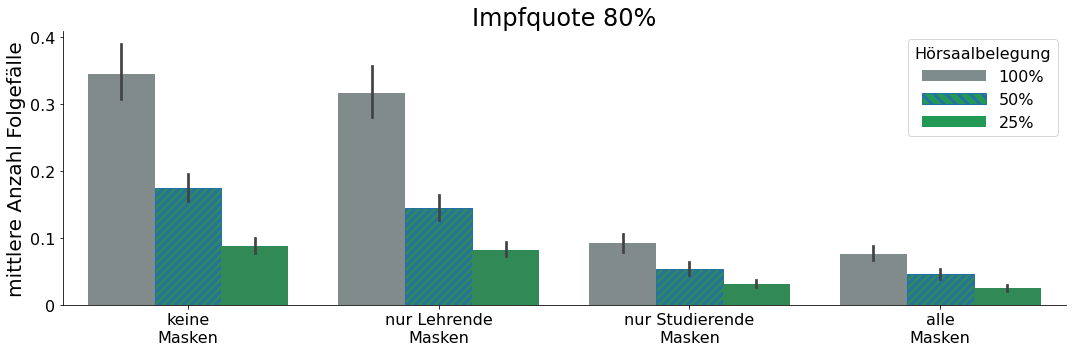

In [6]:
green = '#229954'
blue = '#2471A3'
grey = '#7F8C8D'

plt.rcParams['hatch.linewidth'] = 3
order = ['keine Masken', 'nur Lehrende Masken', 'nur Studierende Masken', 'alle Masken']
hue_order = ['100%', '50%', '25%']
vacc_ratio = 0.8
subset = results[results['unistudent_vaccination_ratio'] == vacc_ratio]
g = sns.catplot(x='scenario', y='infected_agents',
                hue='Hörsaalbelegung', data=subset, kind="bar", aspect=3,
                order=order, legend=False, palette=[grey, green, green],
                row='unistudent_vaccination_ratio', hue_order=hue_order)

ax = g.axes[0][0]
ax.set_title('Impfquote {:1.0f}%'.format(vacc_ratio * 100), fontsize=24)
ax.set_ylabel('mittlere Anzahl Folgefälle', fontsize=20)
ax.set_xlabel('')
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
ax.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], fontsize=16)
ax.set_xticklabels(['keine\nMasken', 'nur Lehrende\nMasken', 
                    'nur Studierende\nMasken', 'alle\nMasken'], fontsize=16)

for i in [4, 5, 6, 7]:
    bar = ax.patches[i]
    hatch = '///'
    bar.set_hatch(hatch)
    bar.set_edgecolor(blue)

patch1 = mpatches.Patch(facecolor=grey,label='100%')
patch2 = mpatches.Patch(facecolor=green, hatch='\\\\',label='50%', edgecolor=blue)
patch3 = mpatches.Patch(facecolor=green, label='25%')

legend = ax.legend(handles = [patch1, patch2, patch3], loc=1, fontsize=16, 
          title='Hörsaalbelegung', handlelength=4)
plt.setp(legend.get_title(),fontsize=16)
plt.tight_layout()
plt.savefig('../../plots/results_current_vaccination_rate.png', dpi=300)
plt.savefig('../../plots/results_current_vaccination_rate.pdf')

print('{:1.1f}% of index cases to not lead to an outbreak'\
      .format(len(subset[subset['infected_agents'] == 0]) / len(subset) * 100))

In [329]:
results['unistudent_vaccination_ratio']

0         0.8
1         0.8
2         0.8
3         0.8
4         0.8
         ... 
239995    0.7
239996    0.7
239997    0.7
239998    0.7
239999    0.7
Name: unistudent_vaccination_ratio, Length: 240000, dtype: float64

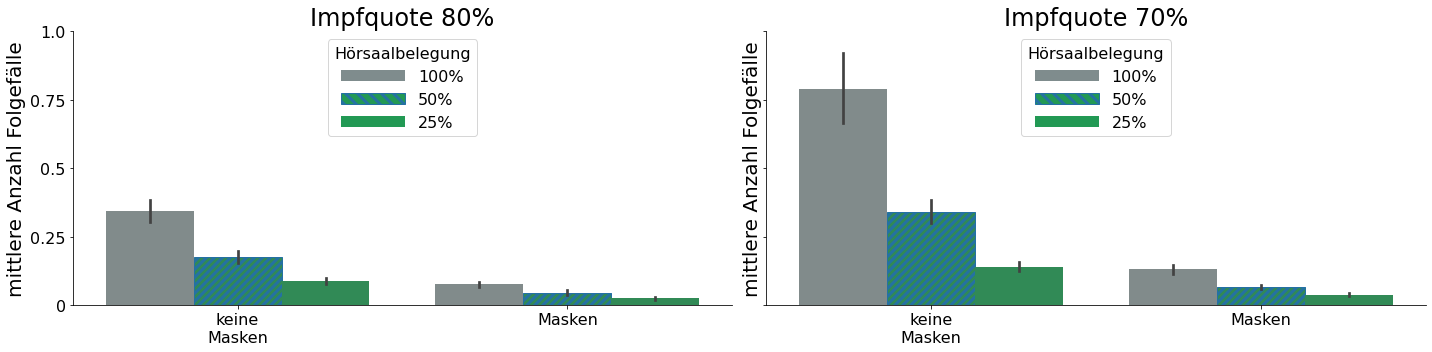

In [353]:
reen = '#229954'
blue = '#2471A3'
grey = '#7F8C8D'

plt.rcParams['hatch.linewidth'] = 3
order = ['keine Masken', 'alle Masken']
hue_order = ['100%', '50%', '25%']
vacc_ratios = [0.8, 0.7]
subset = results[(results['unistudent_vaccination_ratio'].isin(vacc_ratios)) & \
                 (results['scenario'].isin(order))]

g = sns.catplot(x='scenario', y='infected_agents',
                hue='Hörsaalbelegung', data=subset, kind="bar", aspect=2,
                order=order, legend=False, palette=[grey, green, green],
                col='unistudent_vaccination_ratio', hue_order=hue_order,
                col_order=vacc_ratios)


patch1 = mpatches.Patch(facecolor=grey,label='100%')
patch2 = mpatches.Patch(facecolor=green, hatch='\\\\',label='50%', edgecolor=blue)
patch3 = mpatches.Patch(facecolor=green, label='25%')

for ax, vacc_ratio in zip(g.axes[0], vacc_ratios):

    ax.set_title('Impfquote {:1.0f}%'.format(vacc_ratio * 100), fontsize=24)
    ax.set_xlabel('')
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0], fontsize=16)
    ax.set_xticklabels(['keine\nMasken', 'Masken'], fontsize=16)
    ax.set_ylabel('mittlere Anzahl Folgefälle', fontsize=20)

    for i in [2, 3]:
        bar = ax.patches[i]
        hatch = '///'
        bar.set_hatch(hatch)
        bar.set_edgecolor(blue)

    legend = ax.legend(handles = [patch1, patch2, patch3], loc=9, fontsize=16, 
              title='Hörsaalbelegung', handlelength=4)
    plt.setp(legend.get_title(),fontsize=16)

g.axes[0][0].set_ylabel('mittlere Anzahl Folgefälle', fontsize=20)
plt.tight_layout()
plt.savefig('../../plots/results_current_vaccination_rate.png', dpi=300)
plt.savefig('../../plots/results_current_vaccination_rate.pdf')

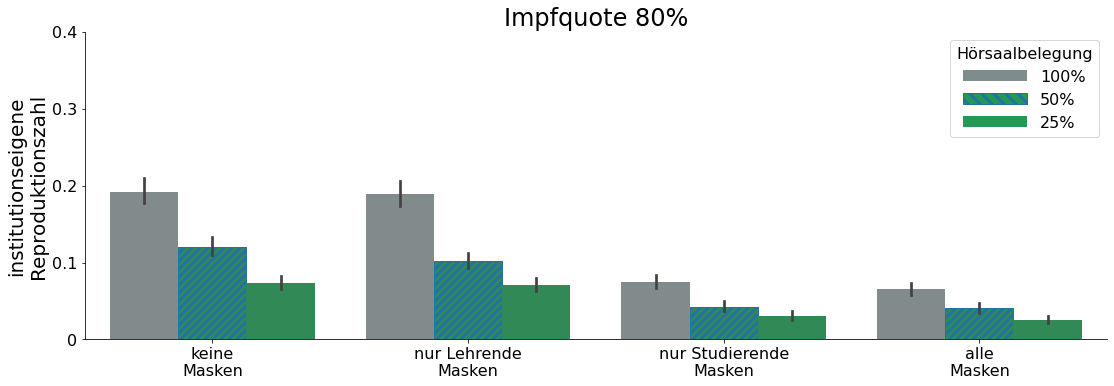

In [345]:
reen = '#229954'
blue = '#2471A3'
grey = '#7F8C8D'

plt.rcParams['hatch.linewidth'] = 3
order = ['keine Masken', 'nur Lehrende Masken', 'nur Studierende Masken', 'alle Masken']
hue_order = ['100%', '50%', '25%']
vacc_ratio = 0.8
subset = results[results['unistudent_vaccination_ratio'] == vacc_ratio]
g = sns.catplot(x='scenario', y='R0',
                hue='Hörsaalbelegung', data=subset, kind="bar", aspect=3,
                order=order, legend=False, palette=[grey, green, green],
                row='unistudent_vaccination_ratio', hue_order=hue_order)

ax = g.axes[0][0]
ax.set_title('Impfquote {:1.0f}%'.format(vacc_ratio * 100), fontsize=24)
ax.set_ylabel('institutionseigeneReproduktionszahl', fontsize=20)
ax.set_xlabel('')
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
ax.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], fontsize=16)
ax.set_xticklabels(['keine\nMasken', 'nur Lehrende\nMasken', 
                    'nur Studierende\nMasken', 'alle\nMasken'], fontsize=16)

for i in [4, 5, 6, 7]:
    bar = ax.patches[i]
    hatch = '///'
    bar.set_hatch(hatch)
    bar.set_edgecolor(blue)

patch1 = mpatches.Patch(facecolor=grey,label='100%')
patch2 = mpatches.Patch(facecolor=green, hatch='\\\\',label='50%', edgecolor=blue)
patch3 = mpatches.Patch(facecolor=green, label='25%')

legend = ax.legend(handles = [patch1, patch2, patch3], loc=1, fontsize=16, 
          title='Hörsaalbelegung', handlelength=4)
plt.setp(legend.get_title(),fontsize=16);

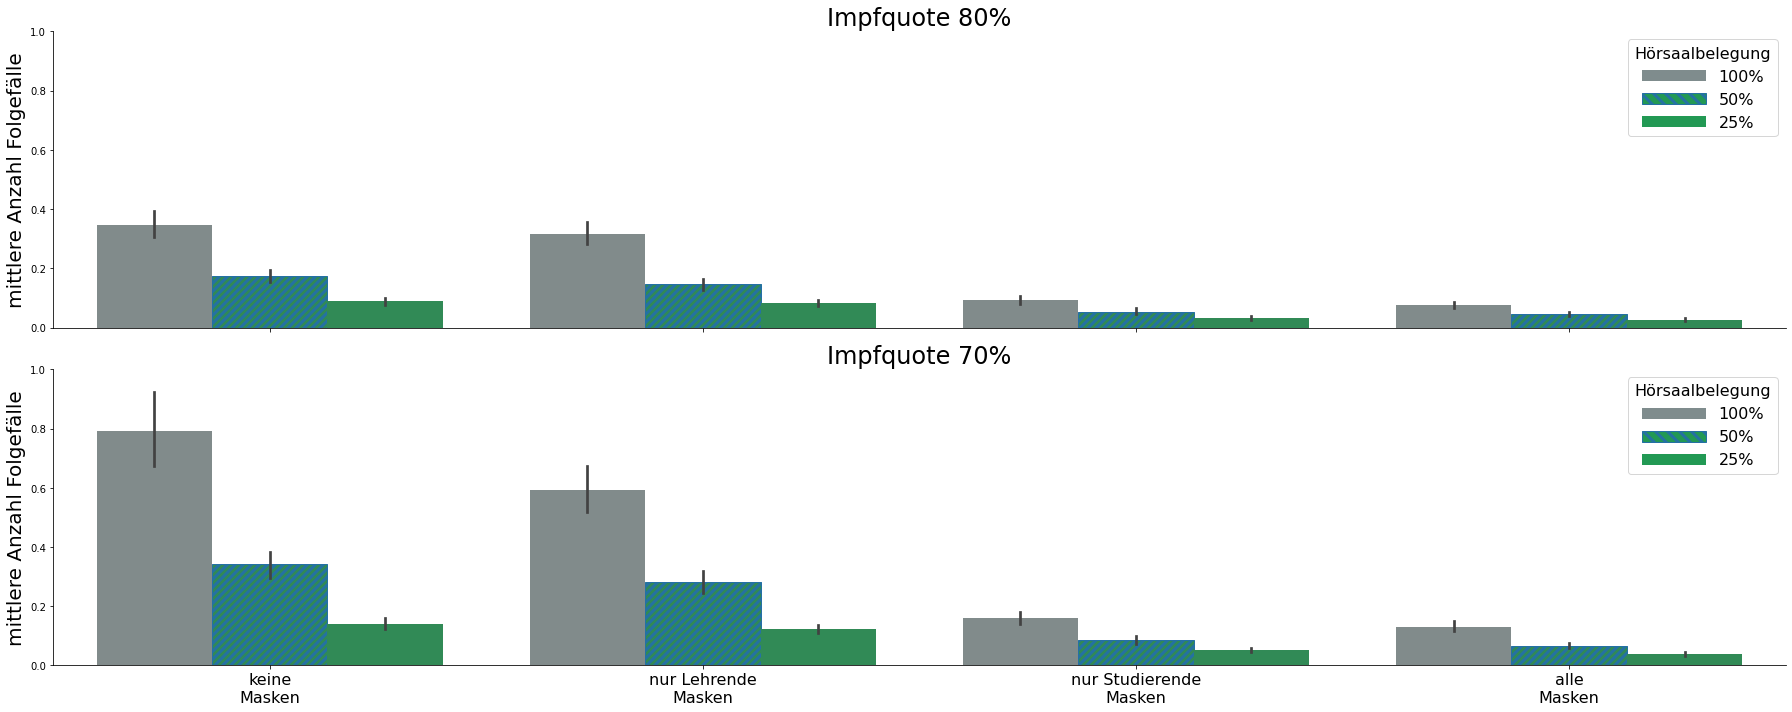

In [295]:
reen = '#229954'
blue = '#2471A3'
grey = '#7F8C8D'

plt.rcParams['hatch.linewidth'] = 3
order = ['keine Masken', 'nur Lehrende Masken', 'nur Studierende Masken', 'alle Masken']
row_order = [0.8, 0.7]
subset = results[results['unistudent_vaccination_ratio'].isin(row_order)]
hue_order = ['100%', '50%', '25%']
g = sns.catplot(x='scenario', y='infected_agents',
                hue='Hörsaalbelegung', data=subset, kind="bar", aspect=5,
                order=order, legend=False, palette=[grey, green, green],
                row='unistudent_vaccination_ratio', hue_order=hue_order,
                row_order=row_order)

for j, vacc_ratio in zip(range(2), row_order):
    ax = g.axes[j][0]
    ax.set_title('Impfquote {:1.0f}%'.format(vacc_ratio * 100), fontsize=24)
    ax.set_ylabel('mittlere Anzahl Folgefälle', fontsize=20)
    ax.set_xlabel('')
    ax.set_ylim(0, 1)
    #ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
    #ax.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], fontsize=16)
    ax.set_xticklabels(['keine\nMasken', 'nur Lehrende\nMasken', 
                        'nur Studierende\nMasken', 'alle\nMasken'], fontsize=16)

    for i in [4, 5, 6, 7]:
        bar = ax.patches[i]
        hatch = '///'
        bar.set_hatch(hatch)
        bar.set_edgecolor(blue)

    patch1 = mpatches.Patch(facecolor=grey,label='100%')
    patch2 = mpatches.Patch(facecolor=green, hatch='\\\\',label='50%', edgecolor=blue)
    patch3 = mpatches.Patch(facecolor=green, label='25%')

    legend = ax.legend(handles = [patch1, patch2, patch3], loc=1, fontsize=16, 
              title='Hörsaalbelegung', handlelength=4)
    plt.setp(legend.get_title(),fontsize=16)
g.fig.tight_layout()

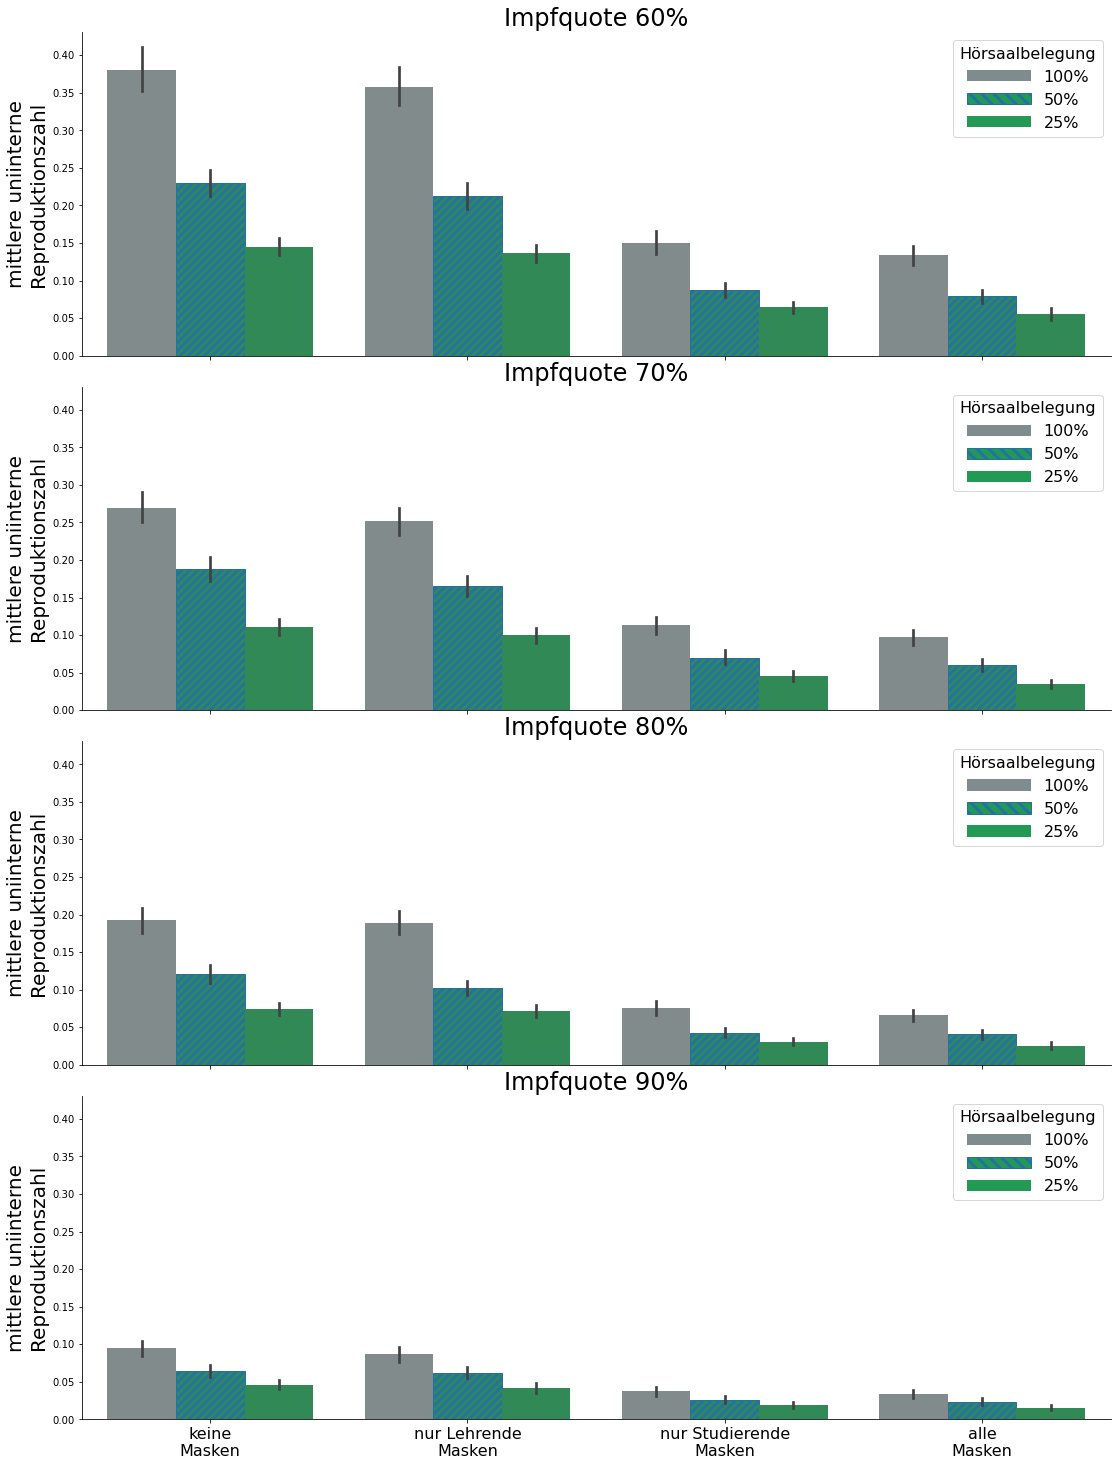

In [297]:
green = '#229954'
blue = '#2471A3'
grey = '#7F8C8D'

plt.rcParams['hatch.linewidth'] = 3
order = ['keine Masken', 'nur Lehrende Masken', 'nur Studierende Masken', 'alle Masken']
row_order = [0.6, 0.7, 0.8, 0.9]
hue_order = ['100%', '50%', '25%']
g = sns.catplot(x='scenario', y='R0',
                hue='Hörsaalbelegung', data=results, kind="bar", aspect=3,
                order=order, legend=False, palette=[grey, green, green],
                row='unistudent_vaccination_ratio', row_order=row_order,
                hue_order=hue_order)

for j, vacc_ratio in zip(range(4), row_order):
    ax = g.axes[j][0]
    ax.set_title('Impfquote {:1.0f}%'.format(vacc_ratio * 100), fontsize=24)
    ax.set_ylabel('mittlere uniinterne\nReproduktionszahl', fontsize=20)
    ax.set_xlabel('')
    #ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
    #ax.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], fontsize=16)
    ax.set_xticklabels(['keine\nMasken', 'nur Lehrende\nMasken', 
                        'nur Studierende\nMasken', 'alle\nMasken'], fontsize=16)

    for i in [4, 5, 6, 7]:
        bar = ax.patches[i]
        hatch = '///'
        bar.set_hatch(hatch)
        bar.set_edgecolor(blue)

    patch1 = mpatches.Patch(facecolor=grey,label='100%')
    patch2 = mpatches.Patch(facecolor=green, hatch='\\\\',label='50%', edgecolor=blue)
    patch3 = mpatches.Patch(facecolor=green, label='25%')

    legend = ax.legend(handles = [patch1, patch2, patch3], loc=1, fontsize=16, 
              title='Hörsaalbelegung', handlelength=4)
    plt.setp(legend.get_title(),fontsize=16);

### Statistics

In [298]:
results = results.set_index(['unistudent_mask', 'lecturer_mask', 
                             'presence_fraction', 'unistudent_vaccination_ratio'])

#### 100% occupancy

In [299]:
results.loc[0, 0, 1, 0.8]['infected_agents'].mean()

<ipython-input-299-542f45b1c0f0>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 1, 0.8]['infected_agents'].mean()


0.3452

In [305]:
results.loc[0, 0, 1, 0.8]['infected_agents'].quantile(0.90)

<ipython-input-305-e1852cf0eaa0>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 1, 0.8]['infected_agents'].quantile(0.90)


1.0

In [303]:
results.loc[0, 0, 1, 0.8]['infected_agents'].quantile(0.99)

<ipython-input-303-9a49b9936fb5>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 1, 0.8]['infected_agents'].quantile(0.99)


6.0

In [306]:
results.loc[0, 0, 1, 0.8]['infected_agents'].max()

<ipython-input-306-35c28ba601dc>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 1, 0.8]['infected_agents'].max()


36.0

#### 50% occupancy

In [307]:
results.loc[0, 0, 0.5, 0.8]['infected_agents'].mean()

<ipython-input-307-d4d7642e94f0>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 0.5, 0.8]['infected_agents'].mean()


0.175

In [308]:
results.loc[0, 0, 0.5, 0.8]['infected_agents'].quantile(0.9)

<ipython-input-308-ebf5bf55a883>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 0.5, 0.8]['infected_agents'].quantile(0.9)


0.0

In [309]:
results.loc[0, 0, 0.5, 0.8]['infected_agents'].quantile(0.99)

<ipython-input-309-65ed5c343f27>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 0.5, 0.8]['infected_agents'].quantile(0.99)


4.0

In [310]:
results.loc[0, 0, 0.5, 0.8]['infected_agents'].max()

<ipython-input-310-b3eae70cf58c>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 0.5, 0.8]['infected_agents'].max()


16.0

#### 100% occupancy & masks

In [311]:
results.loc[1, 1, 1, 0.8]['infected_agents'].mean()

<ipython-input-311-e4b011ee39ea>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[1, 1, 1, 0.8]['infected_agents'].mean()


0.077

In [312]:
results.loc[1, 1, 1, 0.8]['infected_agents'].quantile(0.99)

<ipython-input-312-62769f1ec8df>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[1, 1, 1, 0.8]['infected_agents'].quantile(0.99)


2.0

In [313]:
results.loc[1, 1, 1, 0.8]['infected_agents'].max()

<ipython-input-313-d6072645daea>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[1, 1, 1, 0.8]['infected_agents'].max()


5.0

#### 70% vaccination rate & 100% occupancy

In [314]:
results.loc[0, 0, 1, 0.7]['infected_agents'].mean()

<ipython-input-314-fc334ae367d6>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 1, 0.7]['infected_agents'].mean()


0.791

In [315]:
results.loc[0, 0, 1, 0.7]['infected_agents'].quantile(0.90)

<ipython-input-315-cc7c114fb07c>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 1, 0.7]['infected_agents'].quantile(0.90)


1.0

In [316]:
results.loc[0, 0, 1, 0.7]['infected_agents'].quantile(0.99)

<ipython-input-316-93af57092e45>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 1, 0.7]['infected_agents'].quantile(0.99)


15.0

In [318]:
results.loc[0, 0, 1, 0.7]['infected_agents'].max()

<ipython-input-318-ee6859c01e9b>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 1, 0.7]['infected_agents'].max()


132.0

#### 50% occupancy

In [319]:
results.loc[0, 0, 0.5, 0.7]['infected_agents'].mean()

<ipython-input-319-4cf6422cbcd7>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 0.5, 0.7]['infected_agents'].mean()


0.3416

In [322]:
results.loc[1, 1, 1, 0.8]['infected_agents'].mean()

<ipython-input-322-e4b011ee39ea>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[1, 1, 1, 0.8]['infected_agents'].mean()


0.077

In [277]:
results.loc[0, 0, 0.5, 0.8]['infected_agents'].quantile(0.99)

<ipython-input-277-65ed5c343f27>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 0.5, 0.8]['infected_agents'].quantile(0.99)


4.0

In [278]:
results.loc[0, 0, 0.5, 0.8]['infected_agents'].max()

<ipython-input-278-b3eae70cf58c>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[0, 0, 0.5, 0.8]['infected_agents'].max()


16.0

#### 100% occupancy & masks

In [279]:
results.loc[1, 1, 1, 0.8]['infected_agents'].mean()

<ipython-input-279-e4b011ee39ea>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[1, 1, 1, 0.8]['infected_agents'].mean()


0.077

In [282]:
results.loc[1, 1, 1, 0.8]['infected_agents'].quantile(0.99)

<ipython-input-282-62769f1ec8df>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[1, 1, 1, 0.8]['infected_agents'].quantile(0.99)


2.0

In [283]:
results.loc[1, 1, 1, 0.8]['infected_agents'].max()

<ipython-input-283-d6072645daea>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  results.loc[1, 1, 1, 0.8]['infected_agents'].max()


5.0

<ipython-input-142-23fac08d1481>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  ax.hist(results.loc[0, 0, 1, 0.6]['infected_agents'], bins=range(0, 20, 1), rwidth=0.8)


(array([3.857e+03, 4.850e+02, 1.680e+02, 9.500e+01, 7.600e+01, 3.500e+01,
        3.300e+01, 2.000e+01, 1.300e+01, 1.900e+01, 1.900e+01, 9.000e+00,
        1.100e+01, 6.000e+00, 3.000e+00, 7.000e+00, 1.000e+01, 5.000e+00,
        7.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <BarContainer object of 19 artists>)

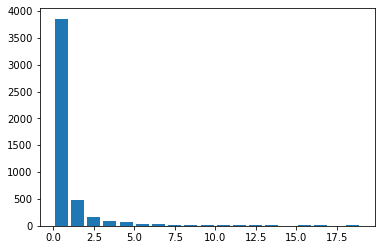

In [142]:
fig, ax = plt.subplots()
ax.hist(results.loc[0, 0, 1, 0.6]['infected_agents'], bins=range(0, 20, 1), rwidth=0.8)

## TTI

In [245]:
src = '../data/simulation_results/ensembles_TTI'

results = pd.DataFrame()
for f in listdir(src):
    tmp = pd.read_csv(join(src, f))
    results = pd.concat([results, tmp])
    
results = results.reset_index(drop=True)
# subtract the index case
results['infected_agents'] = results['infected_agents'] - 1

In [246]:
print('{:1.1f}% of index cases to not lead to an outbreak'\
      .format(len(results[results['infected_agents'] == 0]) / len(results) * 100))

66.3% of index cases to not lead to an outbreak


In [247]:
results['infected_agents'].mean()

402.1256

In [220]:
results['infected_agents'].quantile(0.90)

2580.0

In [221]:
results['infected_agents'].quantile(0.99)

2901.01

In [222]:
results['infected_agents'].max()

3144.0

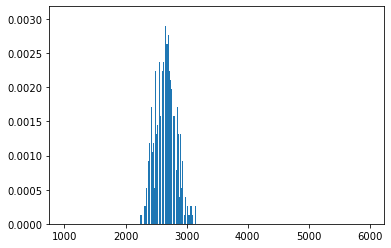

In [223]:
fig, ax = plt.subplots()
ax.hist(results[results['infected_agents'] > 0]['infected_agents'], rwidth=0.8,
        bins=range(1000, 6000, 10), density=True);

## No measures

In [242]:
src = '../data/simulation_results/ensembles_no_intervention'

results = pd.DataFrame()
for f in listdir(src):
    tmp = pd.read_csv(join(src, f))
    results = pd.concat([results, tmp])
    
results = results.reset_index(drop=True)
# subtract the index case
results['infected_agents'] = results['infected_agents'] - 1

In [243]:
print('{:1.1f}% of index cases to not lead to an outbreak'\
      .format(len(results[results['infected_agents'] == 0]) / len(results) * 100))

50.0% of index cases to not lead to an outbreak


In [244]:
results['infected_agents'].mean()

2076.2096

In [230]:
results['infected_agents'].quantile(0.90)

5369.0

In [231]:
results['infected_agents'].quantile(0.99)

5506.01

In [232]:
results['infected_agents'].max()

5645.0

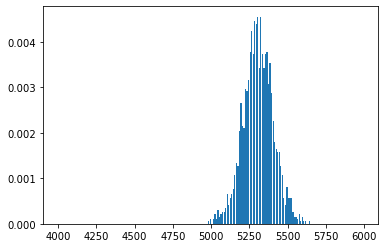

In [233]:
fig, ax = plt.subplots()
ax.hist(results[results['infected_agents'] > 0]['infected_agents'], rwidth=0.8,
        bins=range(4000, 6000, 10), density=True);

In [234]:
results[results['infected_agents'] > 0]['infected_agents'].median()

5273.0

In [235]:
len(results[results['infected_agents'] > 0])

2501